# カーネル密度推定

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

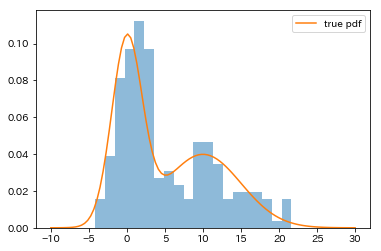

In [2]:
mu1 = 0.
mu2 = 10.
sigma1 = 2
sigma2 = 5.

def gaussian_pdf(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (x - mu)**2 / sigma**2)

def pdf(x, mu1, mu2, sigma1, sigma2):
    return 0.5 * gaussian_pdf(x, mu1, sigma1) + 0.5 * gaussian_pdf(x, mu2, sigma2)

z1 = sigma1 * np.random.normal(size=100) + mu1
z2 = sigma2 * np.random.normal(size=100) + mu2
z = np.concatenate([z1, z2])
_ = plt.hist(z, bins=20, normed=True, alpha=0.5)
x = np.linspace(-10, 30, 100)
plt.plot(x, pdf(x, mu1, mu2, sigma1, sigma2), label='true pdf')
plt.legend()

## 推定

データ$X = [x_{1}, x_{2}, ..., x_{N}]$の生じた分布（確率密度関数）をカーネル関数$k(x_{i}, x_{j})$を用いて、

$p(x) = \frac{1}{N} \sum_{n=1}^{N} k(x_{n}, x)$によって推定する手法である。

### Parzen窓

カーネル関数を$k(x_{i}, x_{j}) = \frac{1}{h} f(\frac{|x_{i} - x_{j}|}{h})$とする。

ただし$h$はパラメータ、$f(u)$は$u \le 1/2$なら$1$、そうでないなら$0$をとる関数である。

In [3]:
def parzen_kernel(xi, xj, h):
    return np.where(np.abs(xi-xj) < 0.5*h, 1./h, 0)

x_train = z
N = len(x_train)
n = len(x)
h = 2.

prob = np.zeros(n)
for i in range(n):
    prob[i] = np.mean(parzen_kernel(x_train, x[i], h))

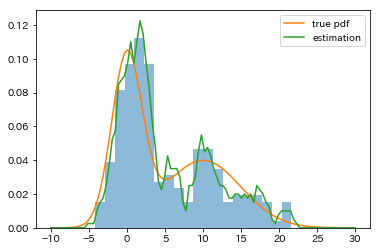

In [4]:
_ = plt.hist(z, bins=20, normed=True, alpha=0.5)
plt.plot(x, pdf(x, mu1, mu2, sigma1, sigma2), label='true pdf')
plt.plot(x, prob, label='estimation')
plt.legend()

### ガウスカーネル

カーネル関数を$k(x_{i}, x_{j}) = \frac{1}{\sqrt{2 \pi} \sigma} \exp{(-\frac{(x_{i} - x_{j})^{2}}{2 \sigma^{2}})}$とする。

ただし$\sigma$はパラメータである。

In [5]:
def gaussian_kernel(xi, xj, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (xi - xj)**2 / sigma**2)

sigma = 1.

prob = np.zeros(n)
for i in range(n):
    prob[i] = np.mean(gaussian_kernel(x_train, x[i], sigma))

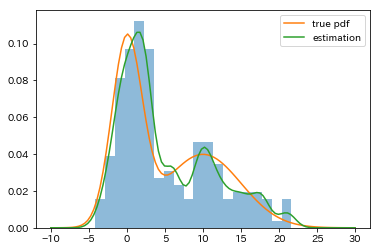

In [6]:
_ = plt.hist(z, bins=20, normed=True, alpha=0.5)
plt.plot(x, pdf(x, mu1, mu2, sigma1, sigma2), label='true pdf')
plt.plot(x, prob, label='estimation')
plt.legend()